In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [45]:
from pyecharts import Scatter
from pyecharts import Scatter3D,Line,Grid

In [3]:
class wifiSlice():
    def __init__(self, name_list,rssi_list,time,x,y):
        self.x_=x
        self.y_=y
        self.name_list_=name_list
        self.rssi_list_=rssi_list
        self.time_=time
    def normRssi(self):
        result=0
        for item in self.rssi_list_:
            result=result+item**2
        result=np.sqrt(result)
        return result
            

In [4]:
def collectdata(datafile):
    result=[]
    with open(datafile,"r") as f:    #设置文件对象
        for index,line in enumerate(f):
            items=line.split('\t')
            try:
                if len(items)>1: 
                    if float(items[1])==0:
                        time,x,y=float(items[5]),float(items[6]),float(items[7])
                        result.append(wifiSlice(nameList,rssiList,time,x,y))
                        nameList=[]
                        rssiList=[]
                        time=-100
                        x=-100
                        y=-100                    
                    else:
                        nameList.append(items[4])
                        rssiList.append(float(items[5]))
            except:
                    nameList=[]
                    rssiList=[]
                    time=-100
                    x=-100
                    y=-100
    return result

In [27]:
datafile='./A5'
resultdata5=collectdata(datafile)[:]
datafile='./10'
resultdata10=collectdata(datafile)[:]
datafile='./11'
resultdata11=collectdata(datafile)[:]

In [35]:
print resultdata5[-1].time_
print resultdata10[-1].time_
print resultdata11[-1].time_

459.915
453.9
455.514


In [37]:
result510=[]
for item in resultdata5:
    for jitem in resultdata10:
        result510.append(cosmatch(item,jitem))
anadata=np.array(result510)

In [38]:
newanadata=np.zeros((len(resultdata10),len(resultdata5),2))
for iindex,item in enumerate(resultdata10):
    for jindex,jitem in enumerate(resultdata5):
        dis,cos=cosmatch(item,jitem)
        newanadata[iindex][jindex][0]=dis
        newanadata[iindex][jindex][1]=cos

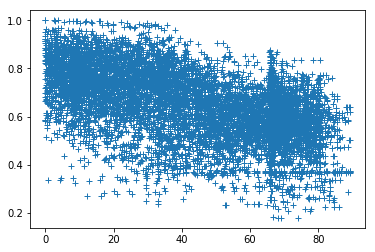

In [74]:
plt.figure()
plt.plot(anadata[:,0],anadata[:,1],"+")
plt.show()

### 匹配不建立并集，那么指纹手机将整体极度的影响精度

### 建立两个阈值，距离阈值是3米，匹配阈值0.65，假阳极高

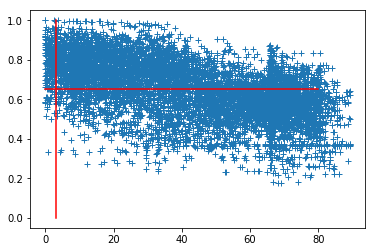

In [109]:
plt.figure()
plt.plot(anadata[:,0],anadata[:,1],"+")
plt.plot([3]*10,np.linspace(0,1,10),'r-')
plt.plot(np.linspace(0,80,10),[0.65]*10,'r-')
plt.show()

In [238]:
disthehold=3
costhehold=0.65
lessdis=len(np.where(anadata[:,0]<disthehold) [0])*1.0/anadata.shape[0]
morecos=len(np.where(anadata[:,1]>costhehold)[0])*1.0/anadata.shape[0]
print "使用A5和XL共完成匹配75X115=%d次匹配"%anadata.shape[0]
print "其中，距离<3m，相似度>0.65的有%f"%(lessdis*morecos)
print "其中，距离>=3m，相似度>0.65的有%f"%((1-lessdis)*morecos)
print "其中，距离<3m，相似度<=0.65的有%f"%(lessdis*(1-morecos))
print "其中，距离>=3m，相似度<=0.65的有%f"%((1-lessdis)*(1-morecos))

使用A5和XL共完成匹配75X115=8625次匹配
其中，距离<3m，相似度>0.65的有0.016324
其中，距离>=3m，相似度>0.65的有0.503212
其中，距离<3m，相似度<=0.65的有0.015096
其中，距离>=3m，相似度<=0.65的有0.465367



|  | 信号匹配高>0.65 | 信号匹配低 |
| ------ | ------ | ------ |
| 空间位置近<3米 | 1.6% | 1.5% |
| 空间位置远 | 50.3% | 46.5% |

|  | 信号匹配高>0.65 | 信号匹配低 |
| ------ | ------ | ------ |
| 空间位置近<3米 | 匹配 | 遗漏 |
| 空间位置远 | 错报 | 不匹配 |

In [11]:
a5p=np.zeros((115,2))
for index,item in enumerate(resultdata5):
    a5p[index][0]=item.x_
    a5p[index][1]=item.y_

In [163]:
#要观察的周期,a5指纹
# %matplotlib
obIndex=5
plt.figure(figsize=(20,10))
plt.scatter(a5p[:,0],a5p[:,1],s=10,c=newanadata[obIndex,:,1])
plt.plot(resultdata10[obIndex].x_,resultdata10[obIndex].y_,'r*')
plt.show()

Using matplotlib backend: Qt5Agg


In [46]:
def custom_formatter(params):
    return params.value[1]
obIndex=1
x_lst = [v[0] for v in a5p]
y_lst = [v[1] for v in a5p]
extra_data = [v*100 for v in newanadata[obIndex,:,1]]
extra_name= ["s" for v in newanadata[obIndex,:,1]]
sc = Scatter(width=1000,height=700)

sc.add(
    "匹配度",
    x_lst,
    y_lst,
    extra_data=extra_data,
    extra_name=extra_name,
    is_visualmap=True,
    visual_dimension=2,
    visual_orient="horizontal",
    visual_type="color",
    visual_range=[0, 100],
    tooltip_formatter=custom_formatter,
)
sc.add("观测点",[resultdata10[obIndex].x_], [resultdata10[obIndex].y_],symbol_size=5)

In [42]:
count=0
for obIndex in range(75):
    index=np.argmax(newanadata[obIndex,:,1])
    dis=newanadata[obIndex,index,0]
    if dis>3:
        count=count+1
        print obIndex,index,dis,newanadata[obIndex,index,1]
print count

0 2 3.56961647232 0.655760806026
1 0 5.4770515366 0.744821140331
2 0 9.02729616519 0.842231222649
3 1 16.1427172197 0.765222147796
4 3 14.2448487575 0.614923028609
5 10 7.89622633232 0.649201019613
7 17 9.04472767872 0.764197706114
8 94 15.9814467582 0.74763533865
10 14 4.3090542241 0.831318891319
11 15 9.26404880854 0.868594801284
12 96 8.96253935061 0.797641712405
13 96 15.2506363362 0.757259923921
14 96 21.6386244609 0.726235500358
15 16 32.8225553782 0.774245441161
16 97 39.2353729952 0.653006495991
17 23 17.0061302729 0.687230226821
18 26 9.31057298969 0.594627620087
19 22 35.1141974152 0.582536582634
20 27 19.236096102 0.598020278098
21 62 36.7371917769 0.697048014323
22 33 8.47015111027 0.68737207694
23 54 27.5107936865 0.757567822408
24 69 8.42232470882 0.674598588572
26 41 6.74373649865 0.764271829753
27 42 8.98893432796 0.797311794062
28 42 15.9491355259 0.80953897131
29 45 9.2908274906 0.755509085731
30 55 9.75221251846 0.75483280421
31 53 8.91810054804 0.771911251832
32 53 

### 大量存在相似度高，但是距离很远的匹配点

<table><tr><td bgcolor=orange> <font face="微软雅黑" size=6 >_相似度最高中大于5m的点有51/75=75%的点_</font></td></tr></table>

In [9]:
discos=np.zeros((75,6))
for obIndex in range(75):
    index=np.argmax(newanadata[obIndex,:,1])
    dis=newanadata[obIndex,index,0]
#     print obIndex,index,dis,newanadata[obIndex,index,1]
    discos[obIndex][0]=dis
    discos[obIndex][1]=newanadata[obIndex,index,1]
    discos[obIndex][2]=resultdata10[obIndex].x_
    discos[obIndex][3]=resultdata10[obIndex].y_
    discos[obIndex][4]=resultdata5[index].x_
    discos[obIndex][5]=resultdata5[index].y_
        

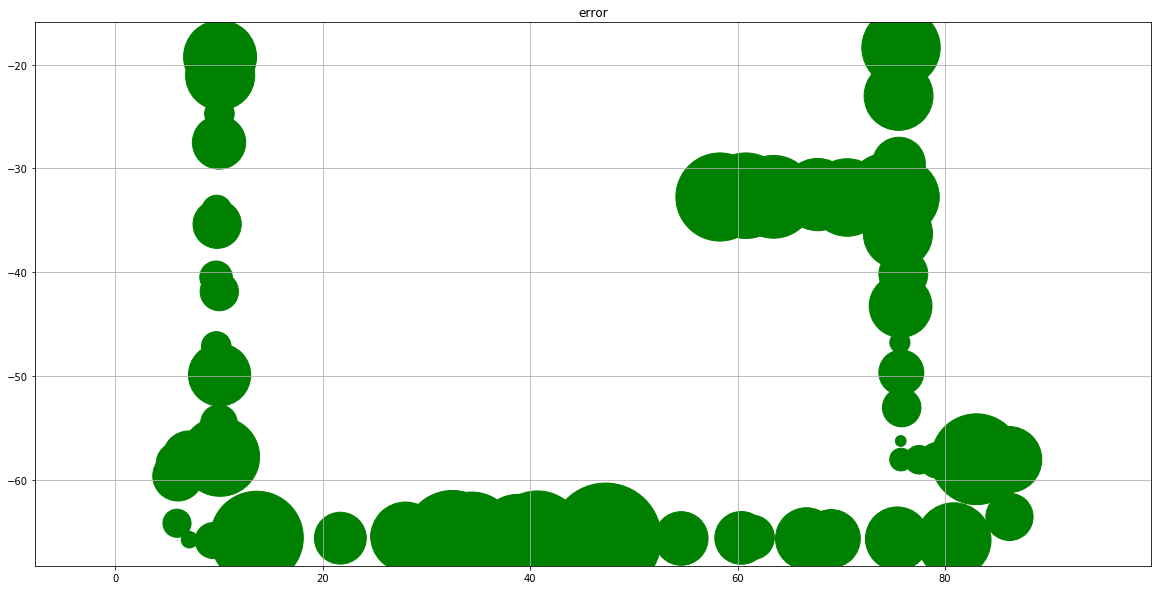

In [345]:

plt.figure(figsize=(20,10))
plt.title('error')
plt.scatter(discos[:,2],discos[:,3],discos[:,0]*300,'g')
# plt.scatter(40,-40,500,'r')
plt.axis('equal')
plt.grid()

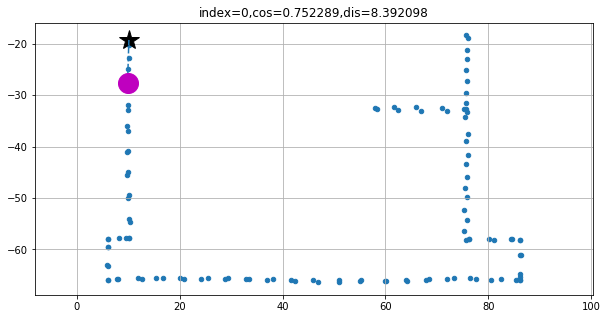

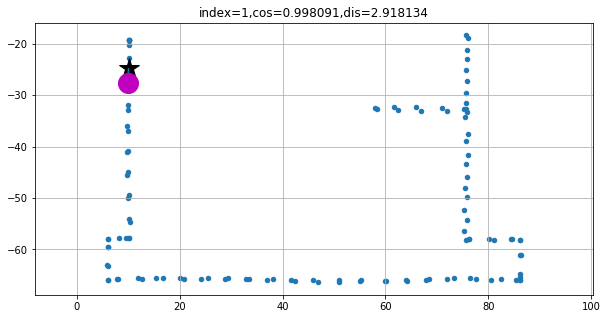

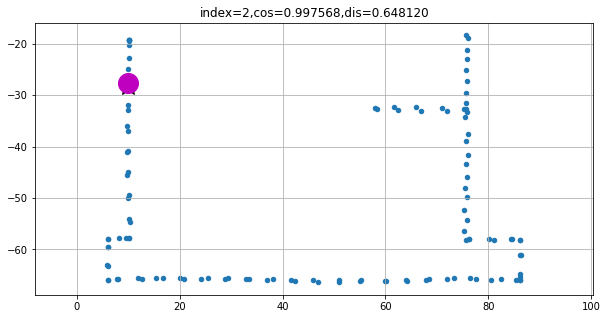

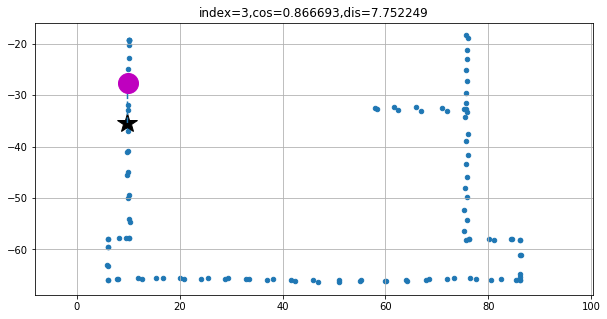

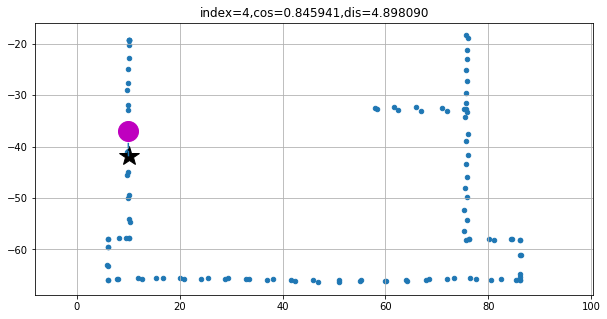

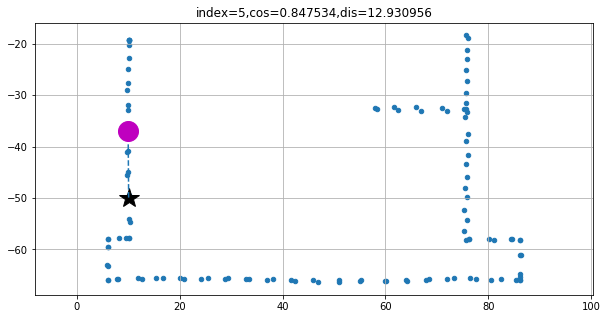

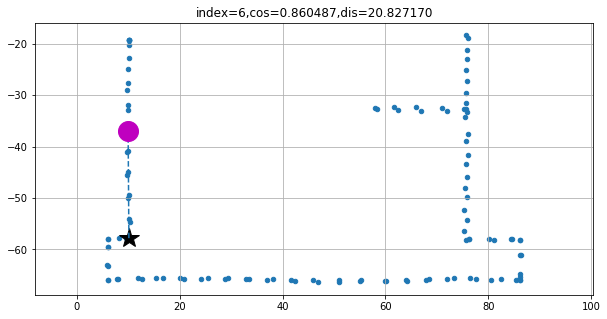

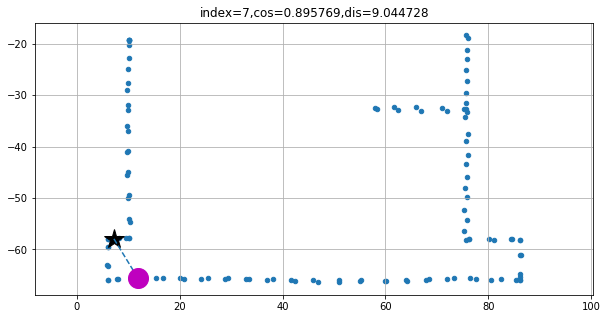

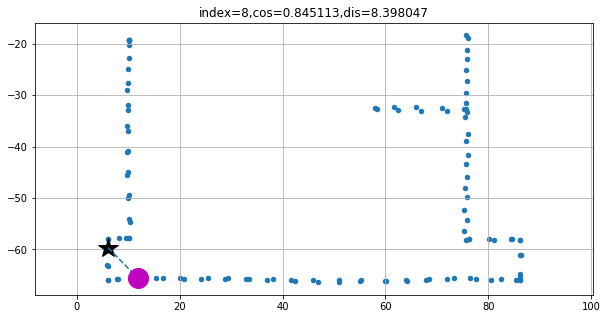

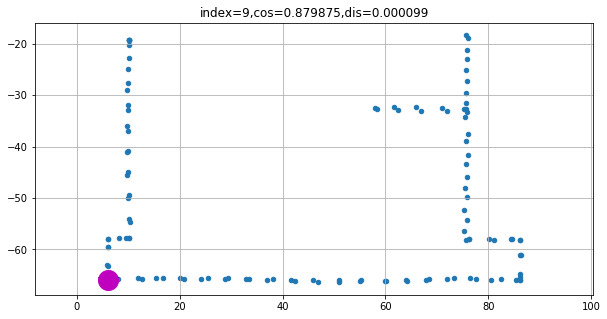

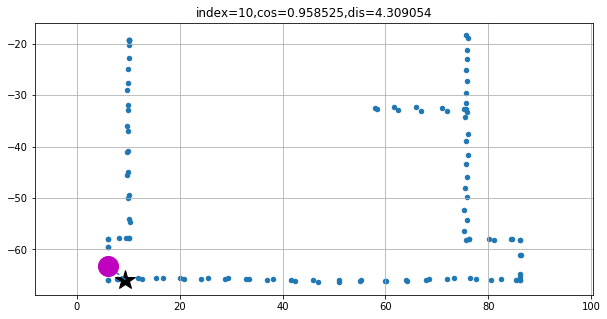

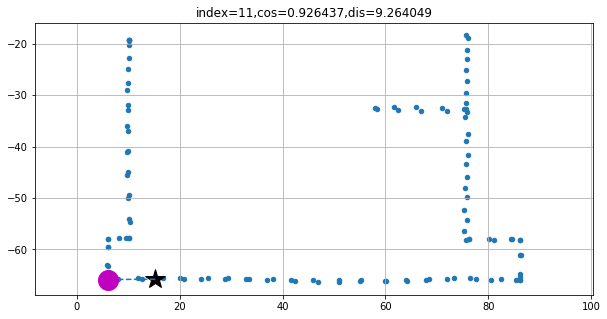

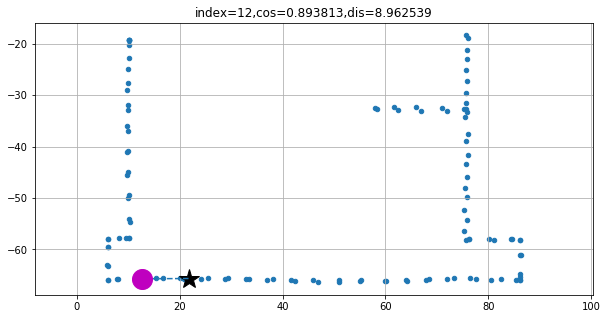

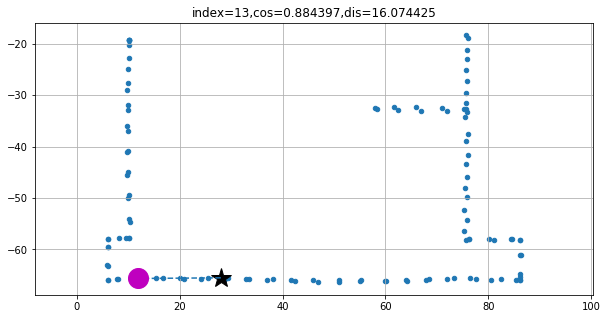

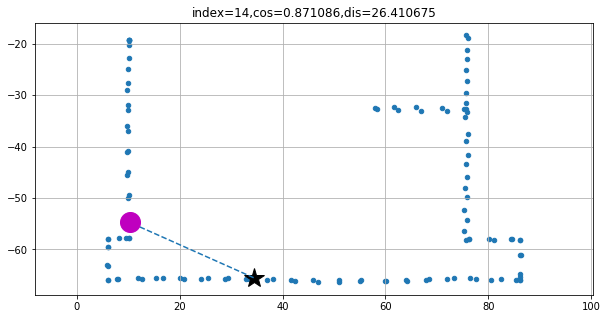

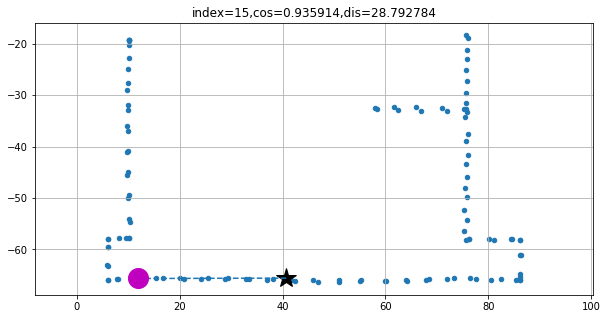

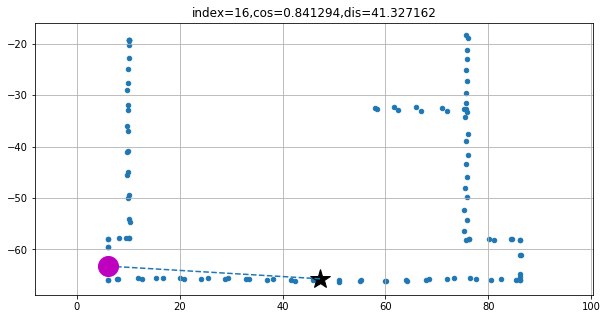

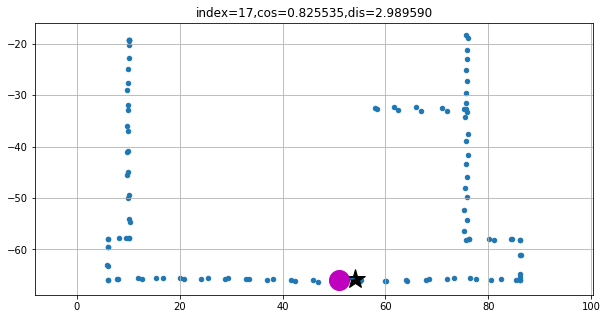

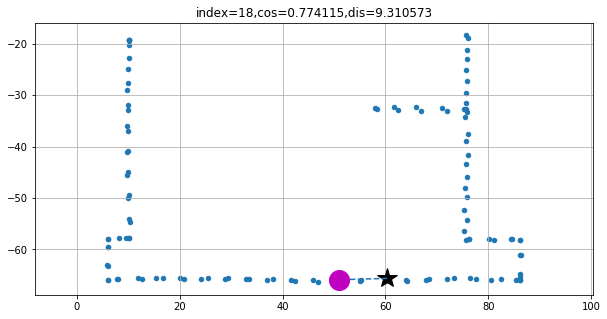

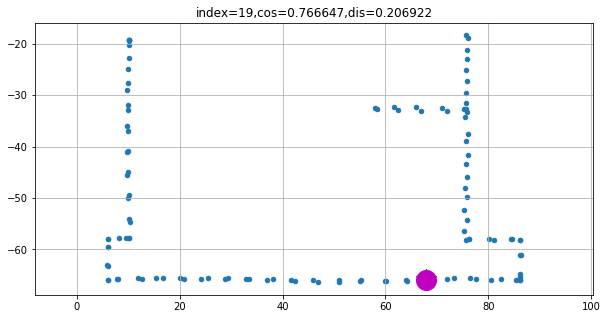

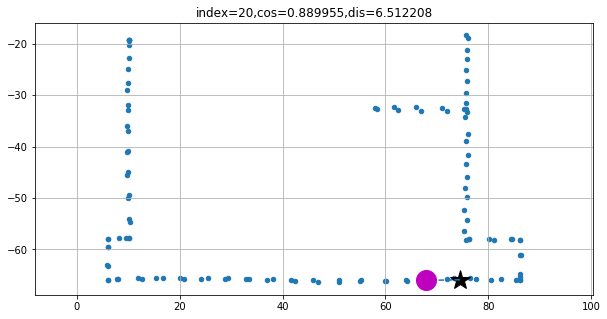

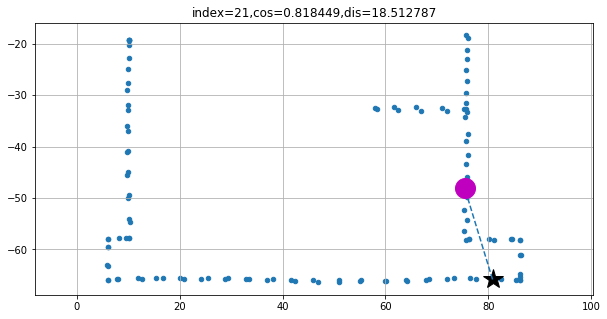

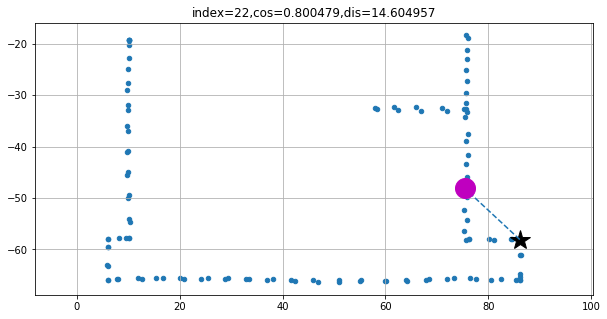

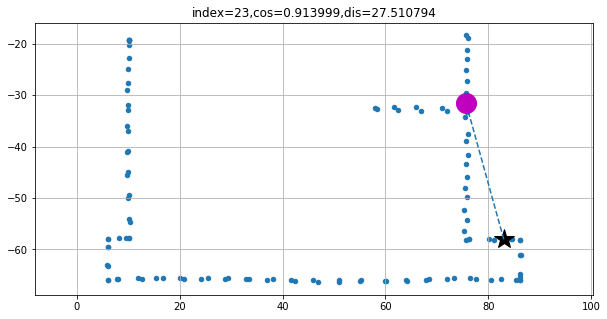

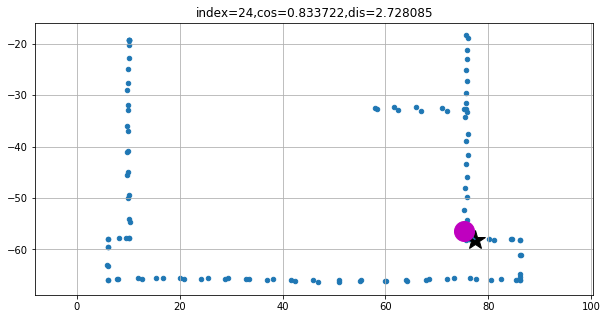

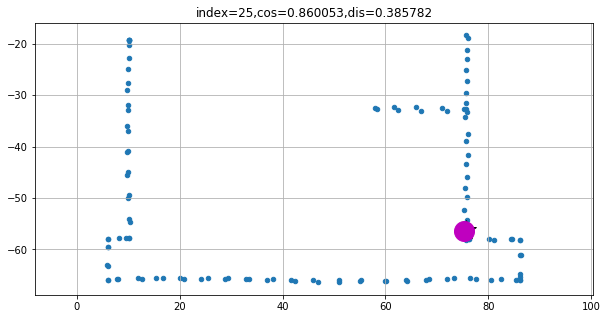

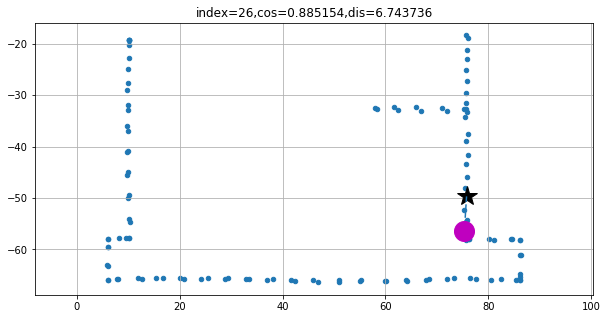

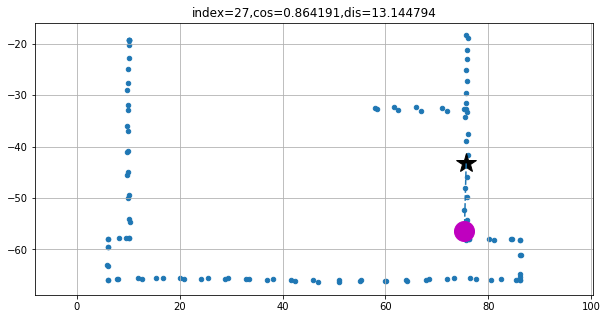

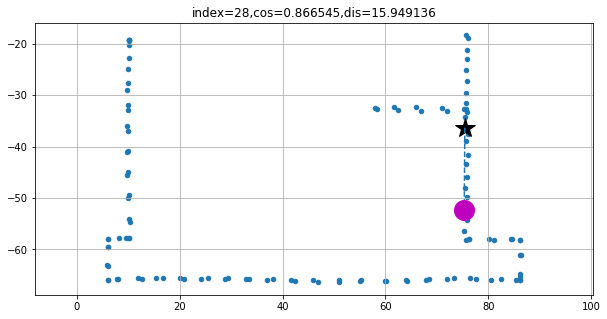

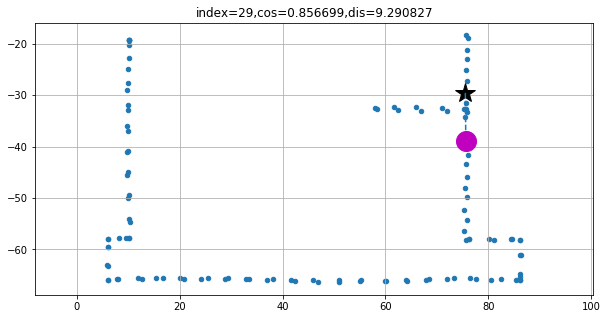

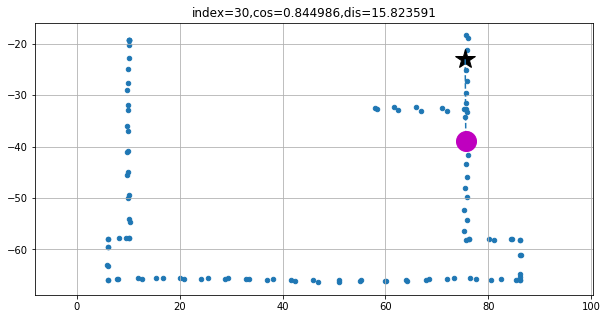

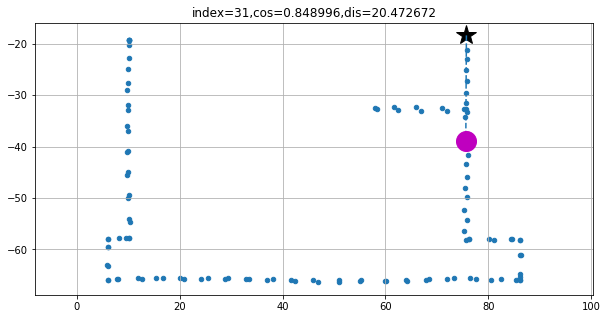

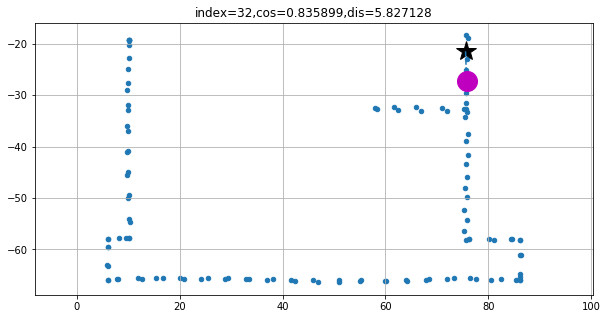

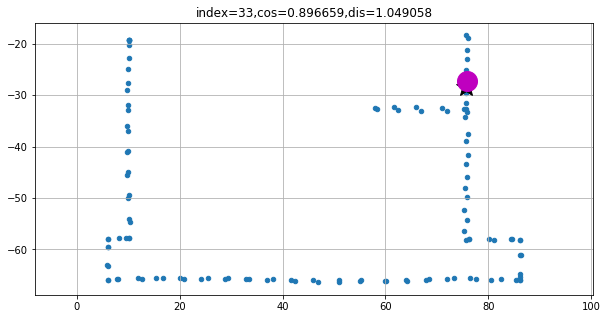

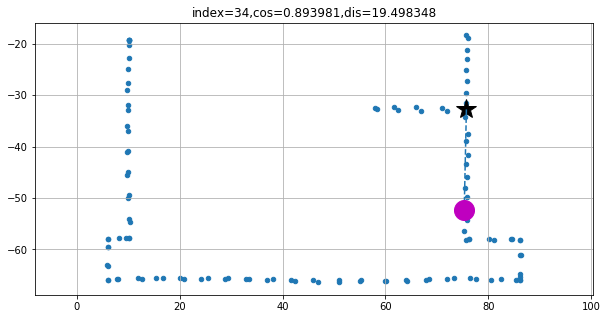

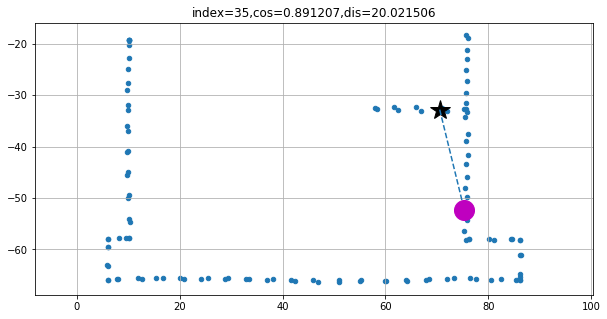

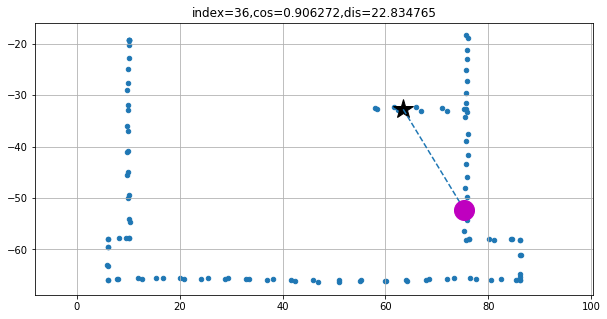

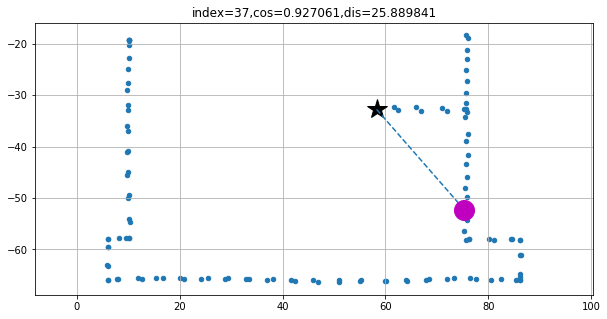

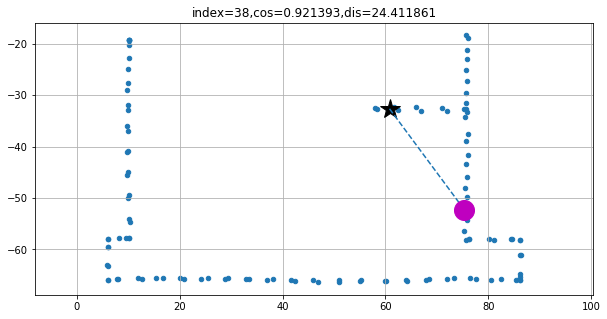

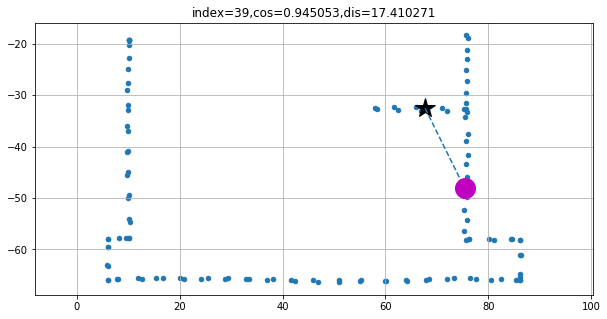

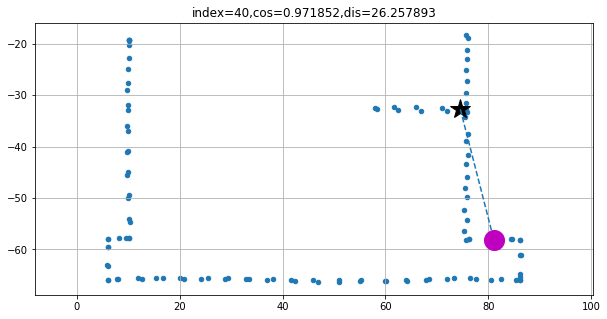

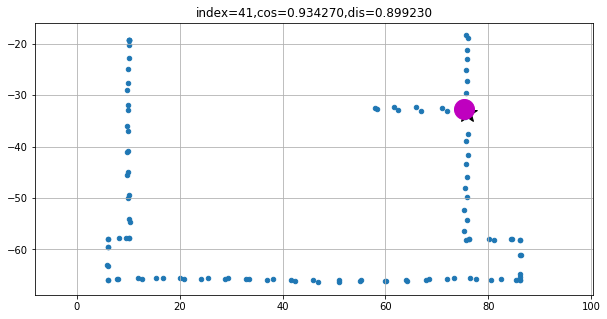

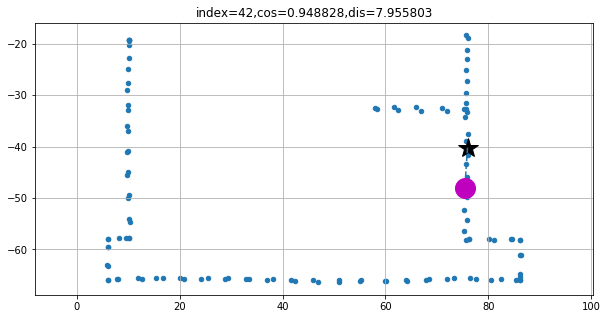

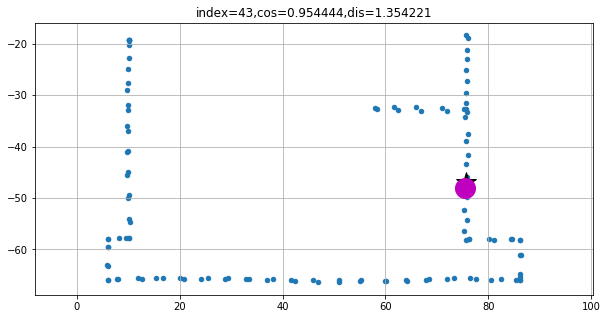

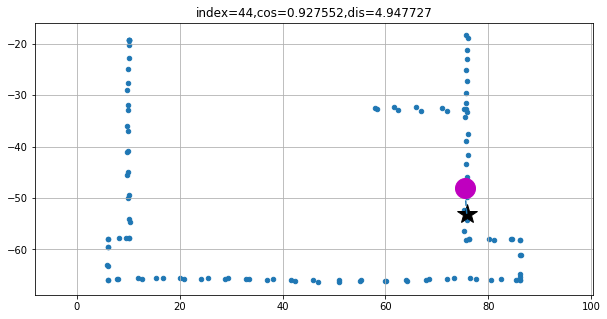

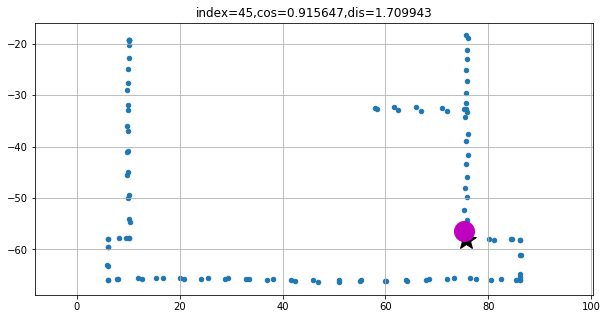

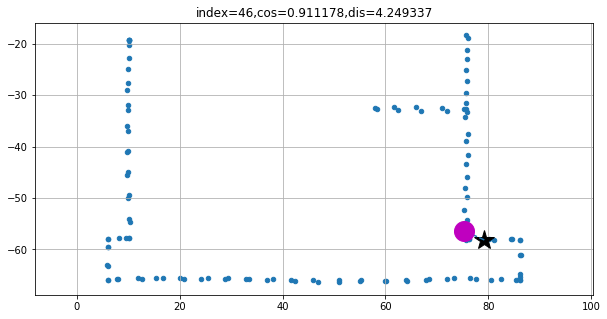

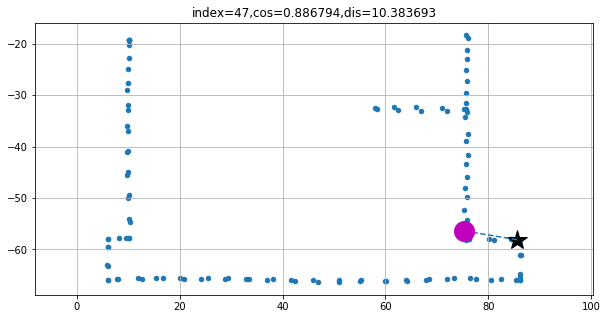

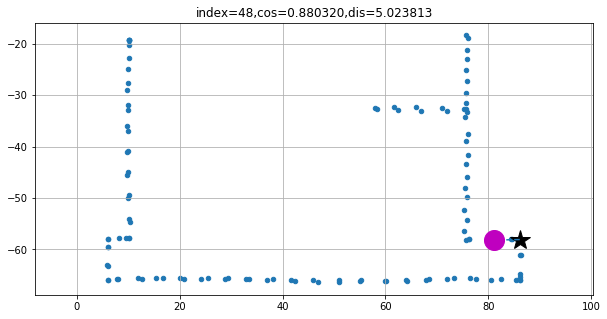

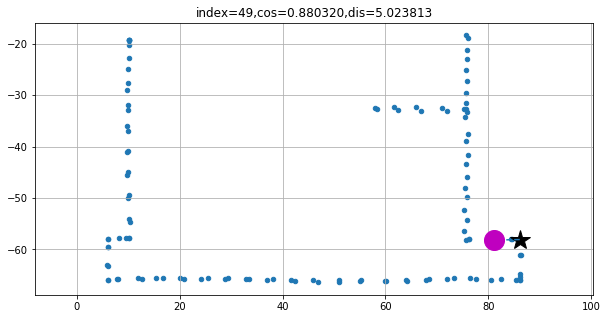

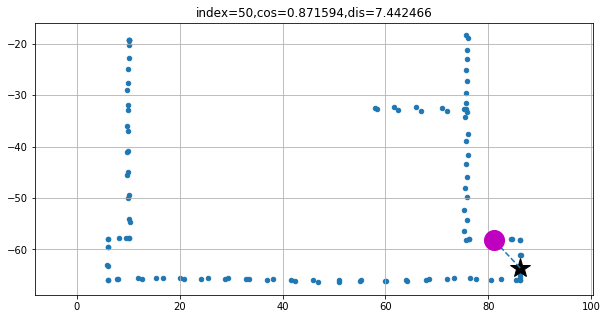

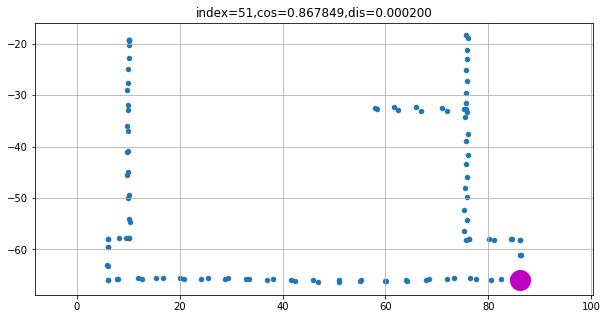

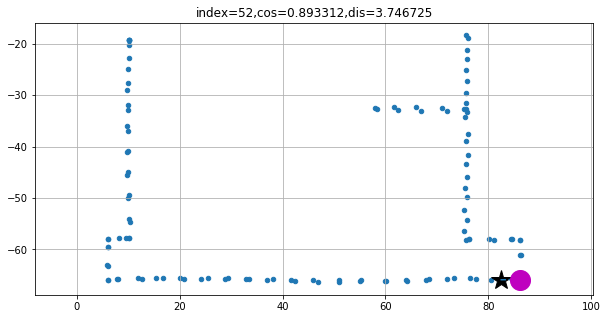

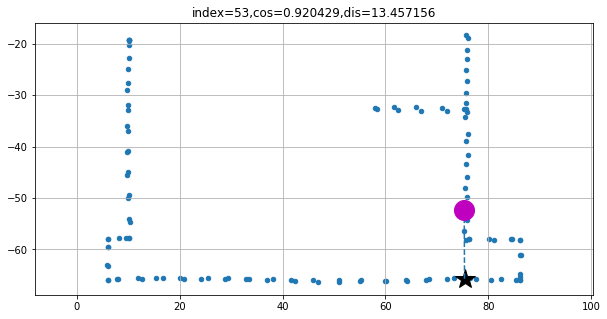

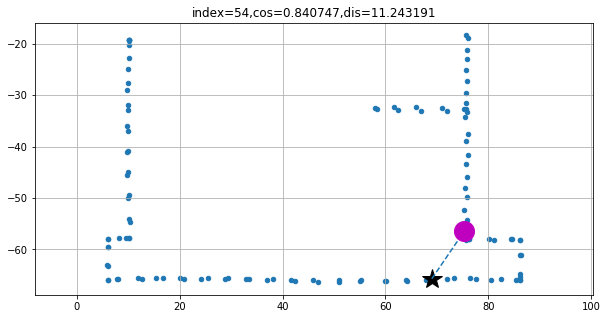

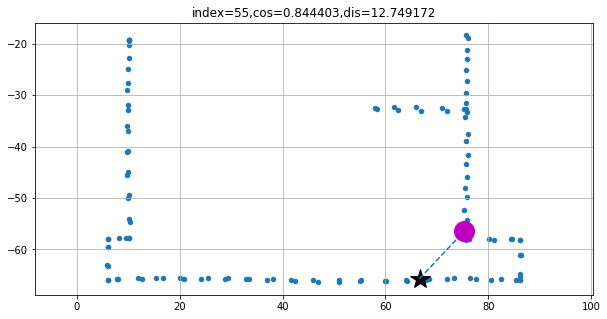

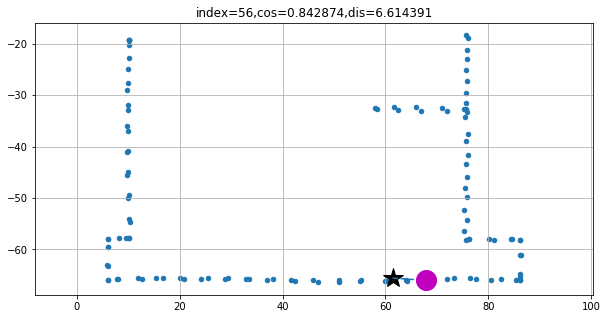

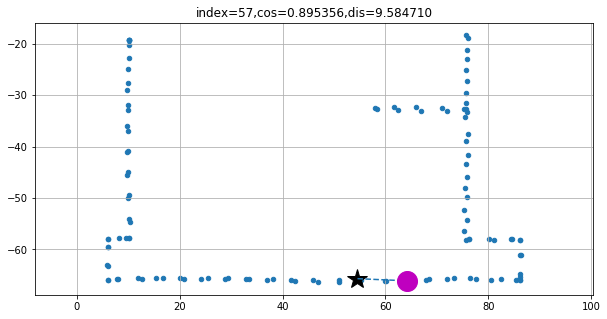

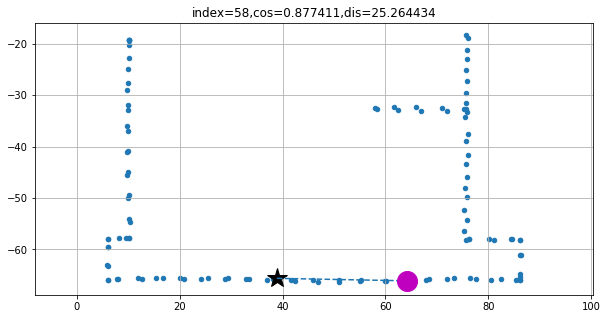

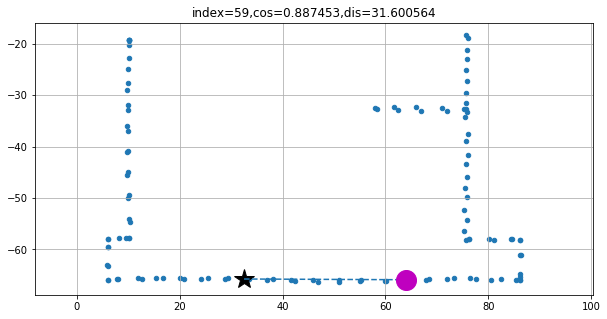

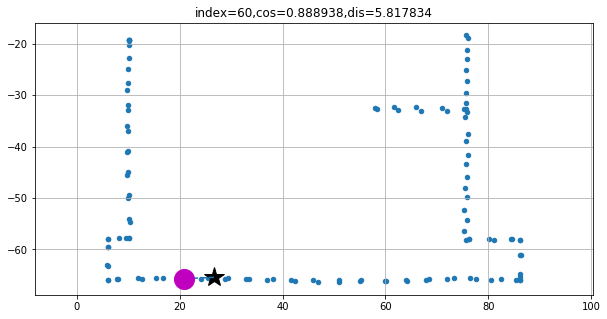

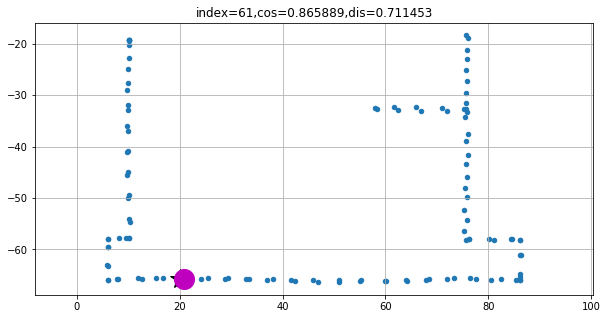

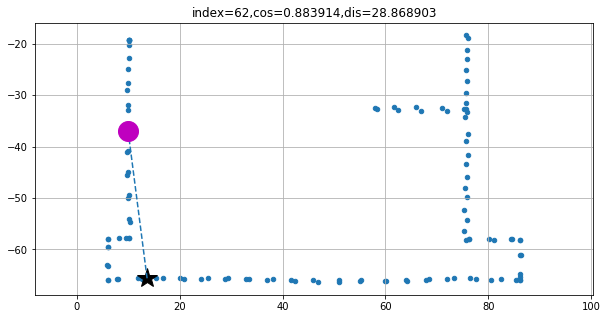

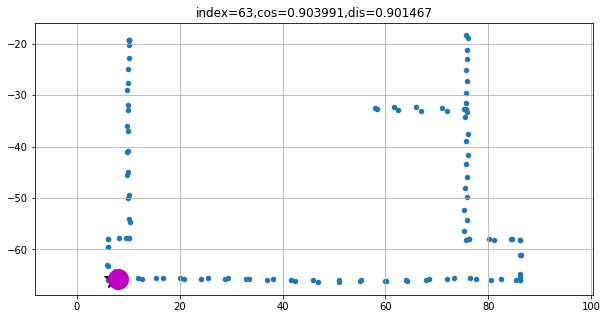

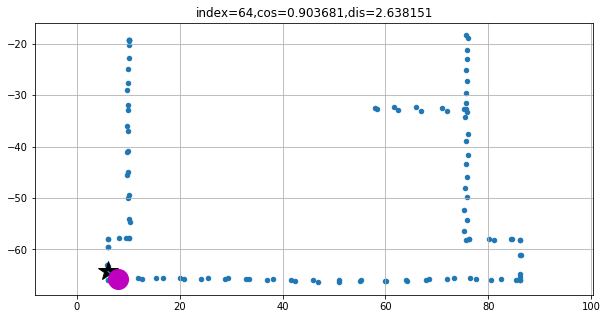

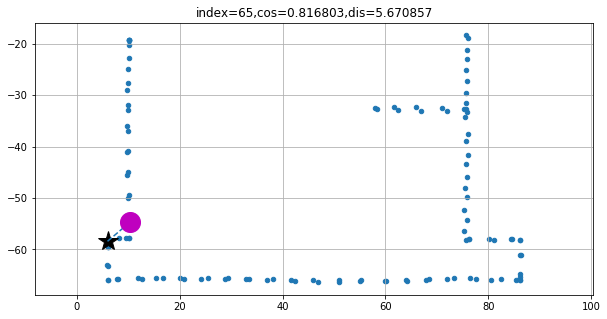

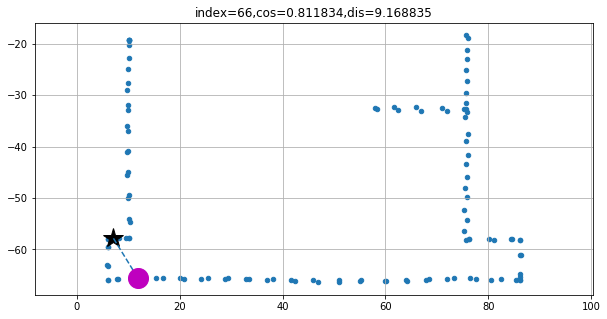

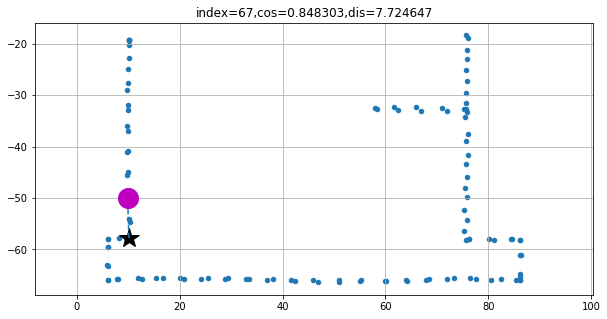

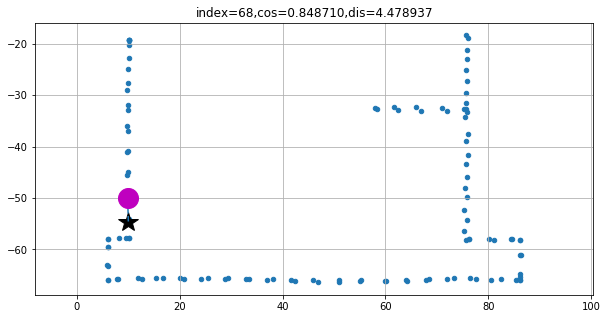

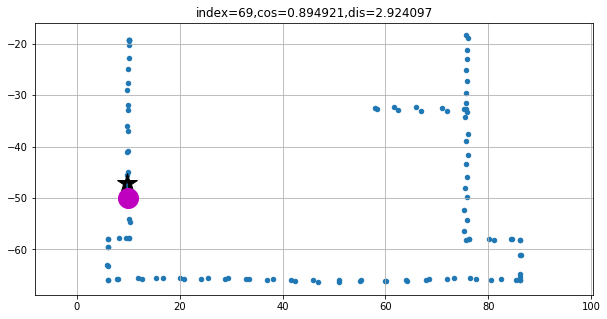

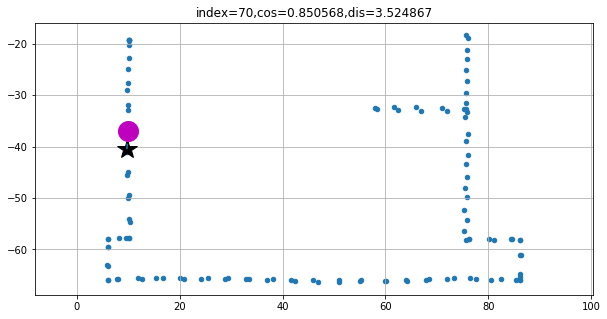

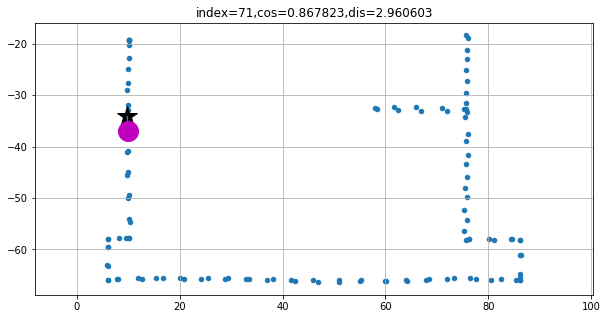

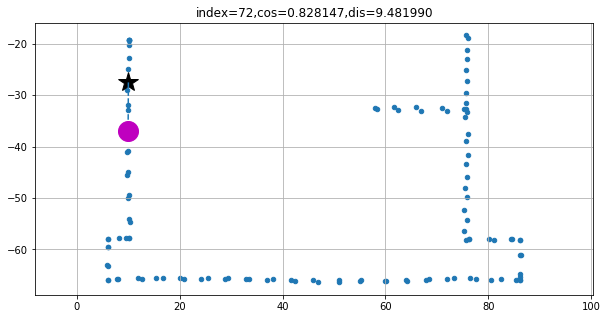

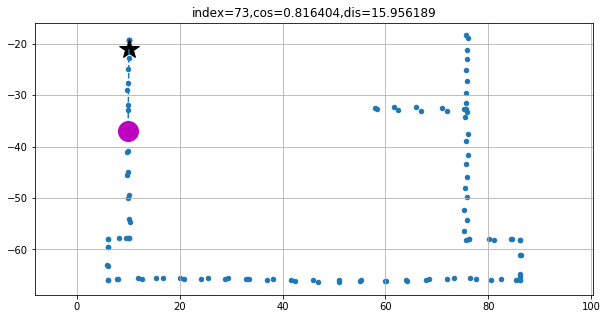

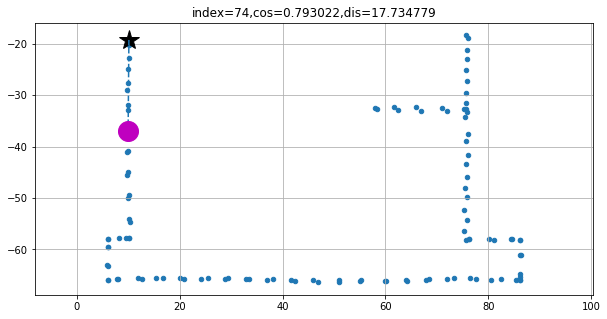

In [43]:
%matplotlib inline
for index in range(75):
    plt.figure(figsize=(10,5))
    plt.scatter(a5p[:,0],a5p[:,1],s=20)
    plt.plot(discos[index,2],discos[index,3],'k*',lw=50,markersize=20)
    plt.plot(discos[index,[2,4]],discos[index,[3,5]],'--')
    plt.plot(discos[index,4],discos[index,5],'mo',lw=50,markersize=20)
    plt.axis('equal')
    plt.grid()
    plt.title('index=%d,cos=%f,dis=%f'%(index,discos[index,1],discos[index,0]))
#     plt.show()
#     break
    plt.savefig('./%d.png'%index,dpi=100)
#     plt.close()
# plt.scatter(40,-40,500,'r')


In [348]:
discos[index,[2,4]],discos[index,[3,5]]

(array([ 10.09973066,   9.95007607]), array([-19.23952081, -36.9736683 ]))

In [319]:
line = Line("距离")
dis=[v[0] for v in discos]
coss=[v[1] for v in discos]
line.add("距离", range(75), dis, is_stack=True)

line2 = Line("相似度")

line2.add("相似度最大", range(75), coss)
# line.render()
grid = Grid(width=800,height=700)
grid.add(line, grid_bottom="60%")
grid.add(line2, grid_top="60%")
# grid.render()

In [29]:
resultdata10[16].rssi_list_

[-88.0,
 -80.0,
 -63.0,
 -54.0,
 -79.0,
 -79.0,
 -82.0,
 -80.0,
 -74.0,
 -70.0,
 -82.0,
 -87.0,
 -89.0]

In [31]:
resultdata5[14].name_list_

['00:01:7a:76:e4:43',
 '00:01:7a:76:e4:52',
 '00:01:7a:76:e4:54',
 '06:69:6c:84:7a:1d',
 '0c:4b:54:3e:ac:3f',
 '70:f9:6d:bb:35:60',
 '70:f9:6d:bb:35:70',
 '70:f9:6d:bb:35:a0',
 '70:f9:6d:bb:35:b0',
 '70:f9:6d:bb:35:e0',
 '70:f9:6d:bb:35:f0',
 '70:f9:6d:c0:aa:10',
 '70:f9:6d:c0:b2:80',
 '70:f9:6d:c0:b2:90',
 '70:f9:6d:c2:ea:c0',
 '92:a6:df:10:41:19',
 'dc:6d:cd:d0:94:cc',
 'f0:85:c1:5a:66:f5']

In [40]:
def cosmatch(wifislice1,wifislice2):
    distance=np.sqrt((wifislice1.x_-wifislice2.x_)**2+(wifislice1.y_-wifislice2.y_)**2)
    secondlist=[]
    for mac in wifislice1.name_list_:
        if mac in wifislice2.name_list_:
            newIndex=wifislice2.name_list_.index(mac)
            secondlist.append(wifislice2.rssi_list_[newIndex])
        else:
            secondlist.append(0)
    print secondlist
    ab=0
    bNorm=0
    for index,rssi in enumerate(secondlist):
        ab=ab+wifislice1.rssi_list_[index]*rssi
        bNorm=bNorm+rssi**2
    if wifislice1.normRssi()<1e-5 or np.sqrt(bNorm)<1e-5:
        cosresult=0
    else:
        cosresult=ab*1.0/wifislice1.normRssi()/wifislice2.normRssi()
    print wifislice1.normRssi()
    print np.sqrt(bNorm)
    return distance,cosresult

In [41]:
cosmatch(resultdata10[3],resultdata5[1])

[0, 0, -89.0, 0, -86.0, -76.0, -89.0, -82.0, -80.0, 0, -85.0, 0]
272.163553769
222.177856682


(16.142717219672978, 0.76522214779640663)